In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [36]:
import warnings
warnings.filterwarnings('ignore')

##### Load Dataset

In [2]:
df = pd.read_csv("C:/Infosys Internship/Datasets/Finalized Dataset/diabetes_prediction_dataset.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [5]:
df.shape

(100000, 9)

In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


#### Checking for null values

In [10]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

No null values found 

#### Data Imbalance Check 

In [19]:
class_counts = df["diabetes"].value_counts() 
class_percentages = df["diabetes"].value_counts(normalize=True) * 100

In [20]:
print("Class Distribution:\n", class_counts)
print("\nPercentage Distribution:\n", class_percentages)

Class Distribution:
 diabetes
0    91500
1     8500
Name: count, dtype: int64

Percentage Distribution:
 diabetes
0    91.5
1     8.5
Name: proportion, dtype: float64


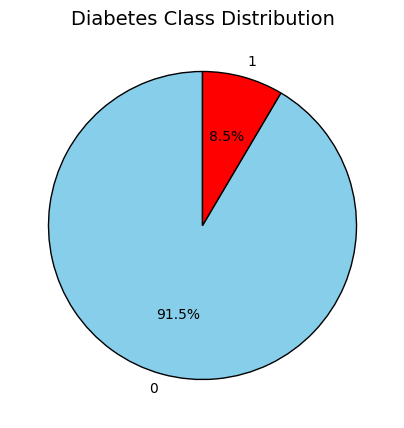

In [24]:
plt.figure(figsize=(5,5))
class_counts.plot(kind="pie", 
                  autopct="%1.1f%%", 
                  colors=["skyblue", "red"], 
                  startangle=90, 
                  wedgeprops={'edgecolor': 'black'}) 

plt.title("Diabetes Class Distribution", fontsize=14)
plt.ylabel("")  # Hides y-label
plt.show()

#### The data is highly imbalanced 

# Key Areas of Exploration:

## 1. Data Quality & Integrity Check

#### i) Examining data for potential outliers and inconsistencies in continuous features such as bmi, blood glucose level, & HbA1c level.

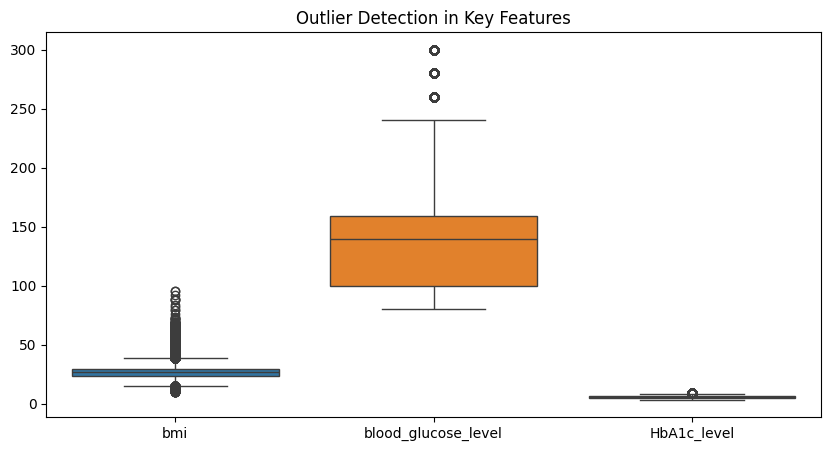

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['bmi', 'blood_glucose_level', 'HbA1c_level']])
plt.title("Outlier Detection in Key Features")
plt.show()

####  ii) Investigating the distribution of gender & smoking history categories.

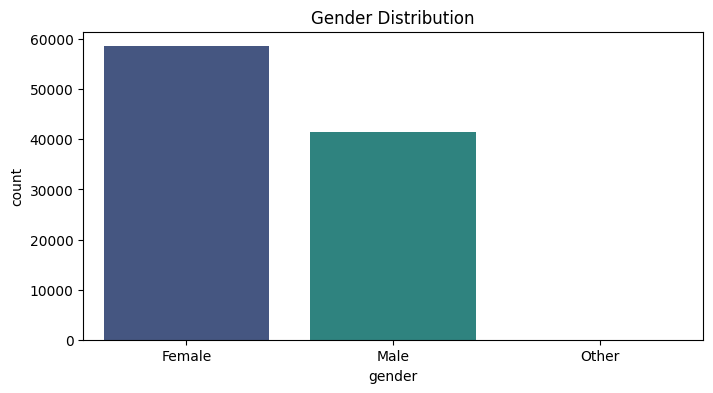

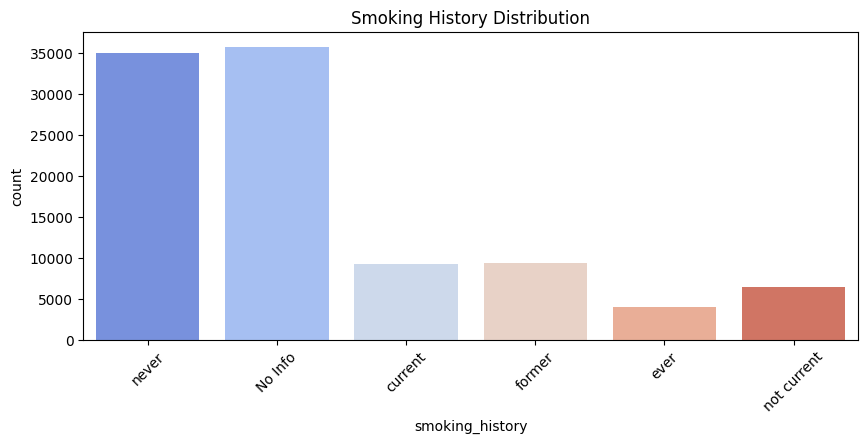

In [37]:
plt.figure(figsize=(8,4))
sns.countplot(x='gender', data=df, palette='viridis')
plt.title("Gender Distribution")
plt.show()

plt.figure(figsize=(10,4))
sns.countplot(x='smoking_history', data=df, palette='coolwarm')
plt.title("Smoking History Distribution")
plt.xticks(rotation=45)
plt.show()

## 2. Univariate Analysis

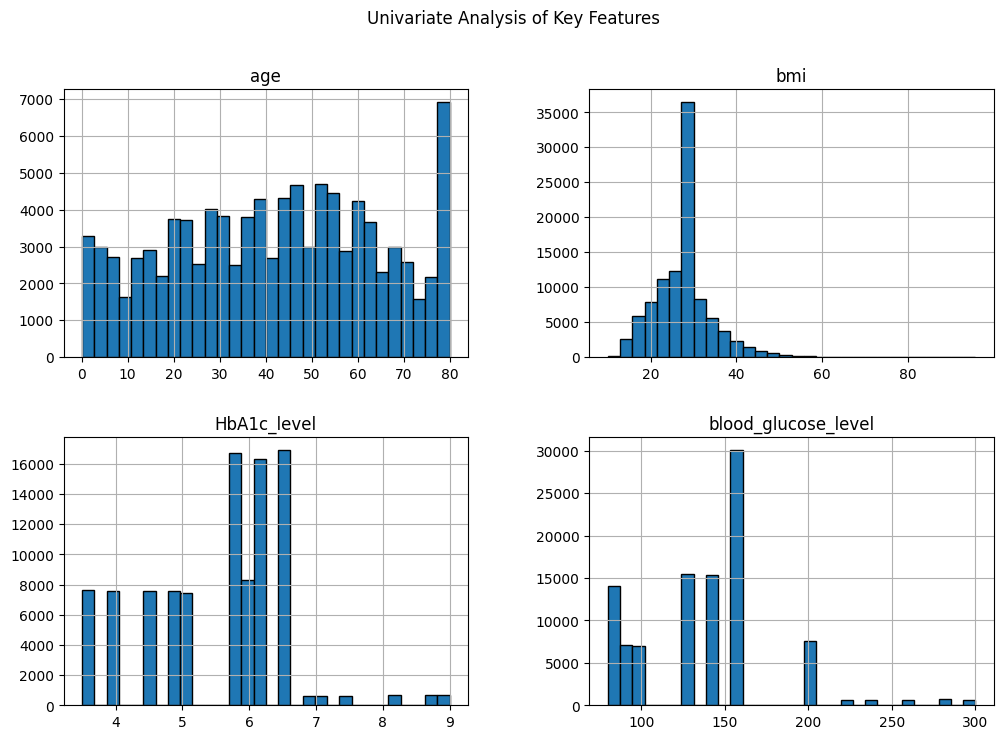

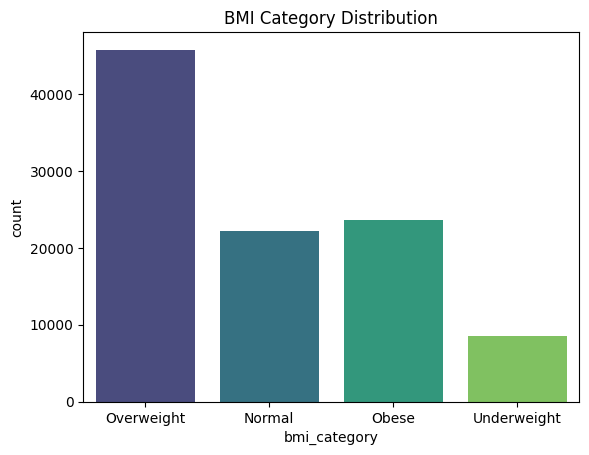

In [38]:
features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
df[features].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Univariate Analysis of Key Features")
plt.show()

# Categorize BMI into Groups
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['bmi_category'] = df['bmi'].apply(categorize_bmi)
sns.countplot(x='bmi_category', data=df, palette='viridis')
plt.title("BMI Category Distribution")
plt.show()

## 3. Bivariate and Multivariate Analysis

#### i) Exploring the relationships between key features:

#### 1. Age vs Diabetes

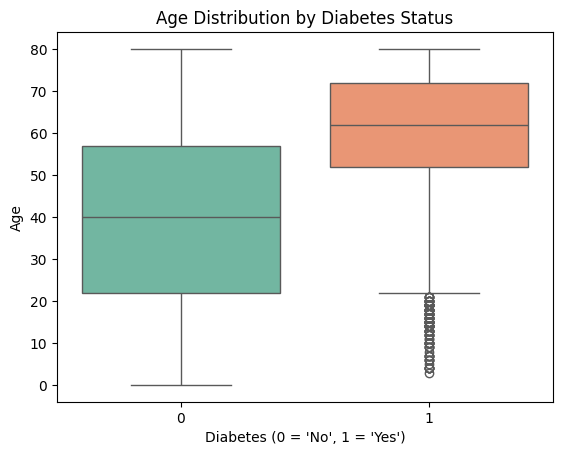

In [39]:
sns.boxplot(x='diabetes', y='age', data=df, palette='Set2')
plt.title("Age Distribution by Diabetes Status")
plt.xlabel("Diabetes (0 = 'No', 1 = 'Yes')")
plt.ylabel("Age")
plt.show()

#### 2. BMI vs Diabetes

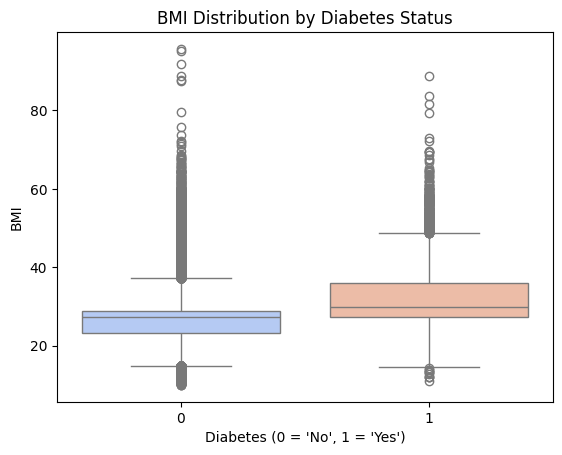

In [40]:
sns.boxplot(x='diabetes', y='bmi', data=df, palette='coolwarm')
plt.title("BMI Distribution by Diabetes Status")
plt.xlabel("Diabetes (0 = 'No', 1 = 'Yes')")
plt.ylabel("BMI")
plt.show()

#### ii) Investigating the impact of smoking history on diabetes prevalence

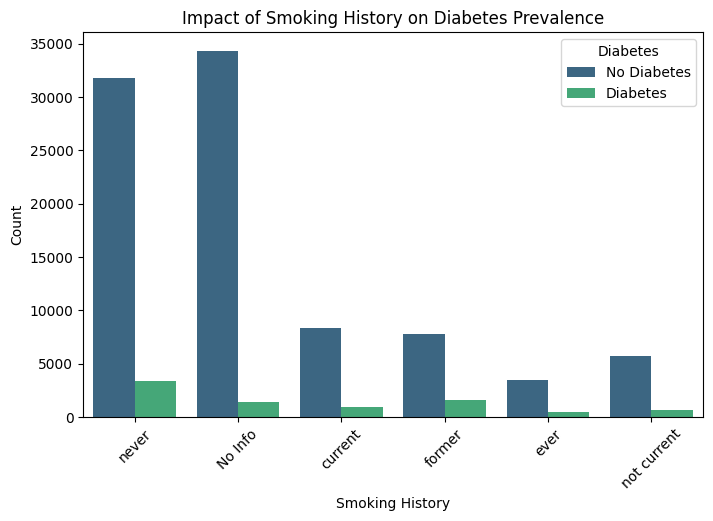

In [43]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='smoking_history', hue='diabetes', palette='viridis')
plt.title('Impact of Smoking History on Diabetes Prevalence')
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes'])
plt.xticks(rotation=45)
plt.show()

### iii) Correlation Heatmap

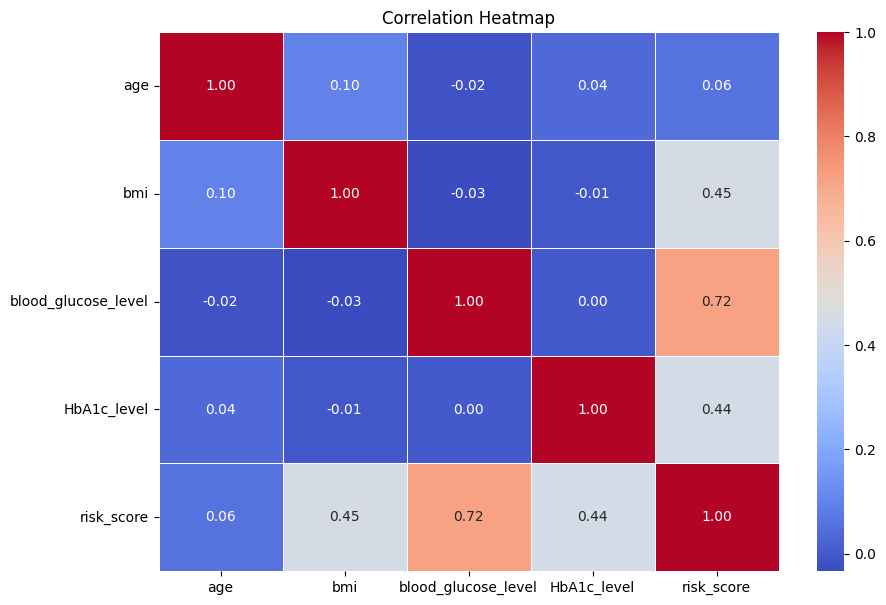

In [122]:
plt.figure(figsize=(10,7))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## 4. Comorbidity Analysis

#### i) The co-occurrence of hypertension and heart disease with diabetes.

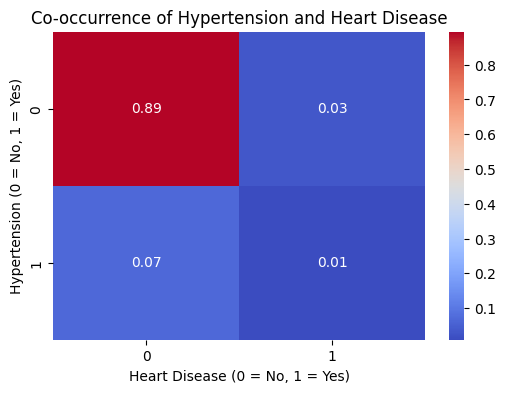

In [48]:
plt.figure(figsize=(6, 4))
sns.heatmap(pd.crosstab(df['hypertension'], df['heart_disease'], normalize='all'), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Co-occurrence of Hypertension and Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Hypertension (0 = No, 1 = Yes)")
plt.show()

#### ii) Analyzing how the number of comorbidities affects diabetes risk

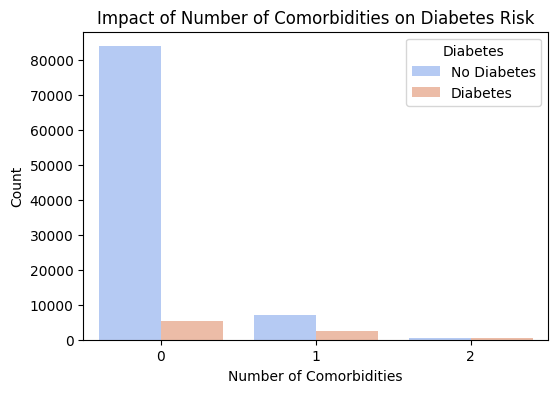

In [49]:
df['comorbidity_count'] = df['hypertension'] + df['heart_disease']
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='comorbidity_count', hue='diabetes', palette='coolwarm')
plt.title("Impact of Number of Comorbidities on Diabetes Risk")
plt.xlabel("Number of Comorbidities")
plt.ylabel("Count")
plt.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes'])
plt.show()

## 5. Gender and Health Outcome Disparities

#### i) Comparing diabetes prevalence across different gender categories (Female, Male, Other)

In [51]:
gender_diabetes = df.groupby("gender")["diabetes"].mean().reset_index()

In [52]:
gender_diabetes

,gender,diabetes
0,Female,0.076189
1,Male,0.097490
2,Other,0.000000


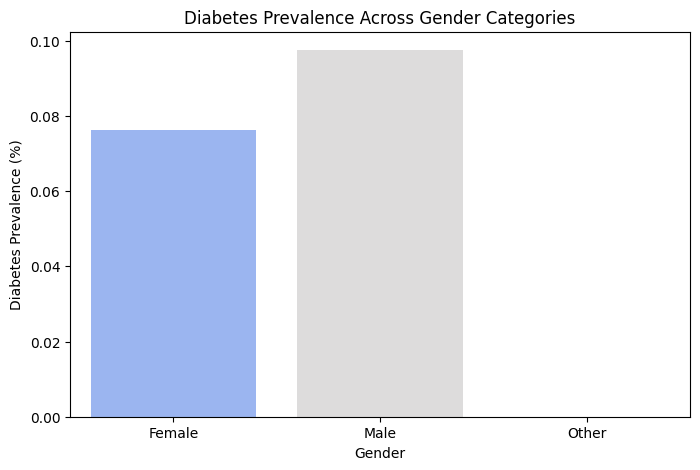

In [53]:
plt.figure(figsize=(8, 5))
sns.barplot(x="gender", y="diabetes", data=gender_diabetes, palette="coolwarm")
plt.xlabel("Gender")
plt.ylabel("Diabetes Prevalence (%)")
plt.title("Diabetes Prevalence Across Gender Categories")
plt.show()

#### ii) Looking for significant differences in health outcomes based on gender

In [54]:
health_outcomes = df.groupby("gender")[["hypertension", "heart_disease"]].mean().reset_index()

In [55]:
health_outcomes

,gender,hypertension,heart_disease
0,Female,0.071680,0.026677
1,Male,0.079363,0.057446
2,Other,0.000000,0.000000


##### Plotting the comparison of hypertension and heart disease rates by gender:

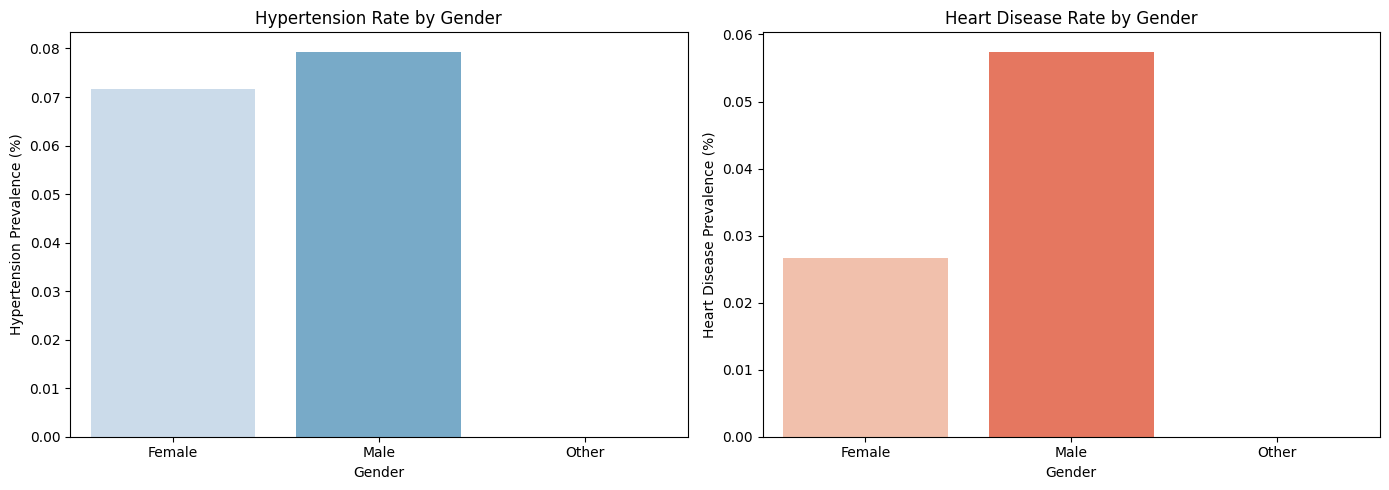

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(x="gender", y="hypertension", data=health_outcomes, palette="Blues", ax=ax[0])
ax[0].set_title("Hypertension Rate by Gender")
ax[0].set_xlabel("Gender")
ax[0].set_ylabel("Hypertension Prevalence (%)")

sns.barplot(x="gender", y="heart_disease", data=health_outcomes, palette="Reds", ax=ax[1])
ax[1].set_title("Heart Disease Rate by Gender")
ax[1].set_xlabel("Gender")
ax[1].set_ylabel("Heart Disease Prevalence (%)")

plt.tight_layout()
plt.show()

## 6. Anomaly Detection and Risk Stratification

#### i) Identifying anomalies in health indicators like extremely high bmi or blood

In [97]:
health_indicators = ["bmi", "blood_glucose_level", "HbA1c_level"]

In [98]:
def detect_anomalies_iqr(df, columns):
    anomalies = pd.DataFrame()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        anomalies = pd.concat([anomalies, outliers])
    return anomalies.drop_duplicates()

def categorize_risk(row):
    if row["bmi"] > 35 and row["HbA1c_level"] > 7 and row["age"] > 60:
        return "Very High Risk"
    elif row["bmi"] > 30 and row["HbA1c_level"] > 6.5 and row["age"] > 50:
        return "High Risk"
    elif row["bmi"] > 25 and row["HbA1c_level"] > 5.7:
        return "Moderate Risk"
    else:
        return "Low Risk"

##### Simulated DataFrame (Replace with actual dataset)

In [99]:
data = {
    "age": np.random.randint(25, 80, 1000),
    "bmi": np.random.uniform(18, 40, 1000),
    "blood_glucose_level": np.random.uniform(70, 250, 1000),
    "HbA1c_level": np.random.uniform(4.5, 9.5, 1000)
}
df = pd.DataFrame(data)

##### Detecting Anomalies

In [100]:
health_indicators = ["bmi", "blood_glucose_level", "HbA1c_level"]
anomalies = detect_anomalies_iqr(df, health_indicators)
print("Anomalies Detected:")
print(anomalies.describe())

Anomalies Detected:
       age  bmi  blood_glucose_level  HbA1c_level
count  0.0  0.0                  0.0          0.0
mean   NaN  NaN                  NaN          NaN
std    NaN  NaN                  NaN          NaN
min    NaN  NaN                  NaN          NaN
25%    NaN  NaN                  NaN          NaN
50%    NaN  NaN                  NaN          NaN
75%    NaN  NaN                  NaN          NaN
max    NaN  NaN                  NaN          NaN


##### Visualizing Anomalies

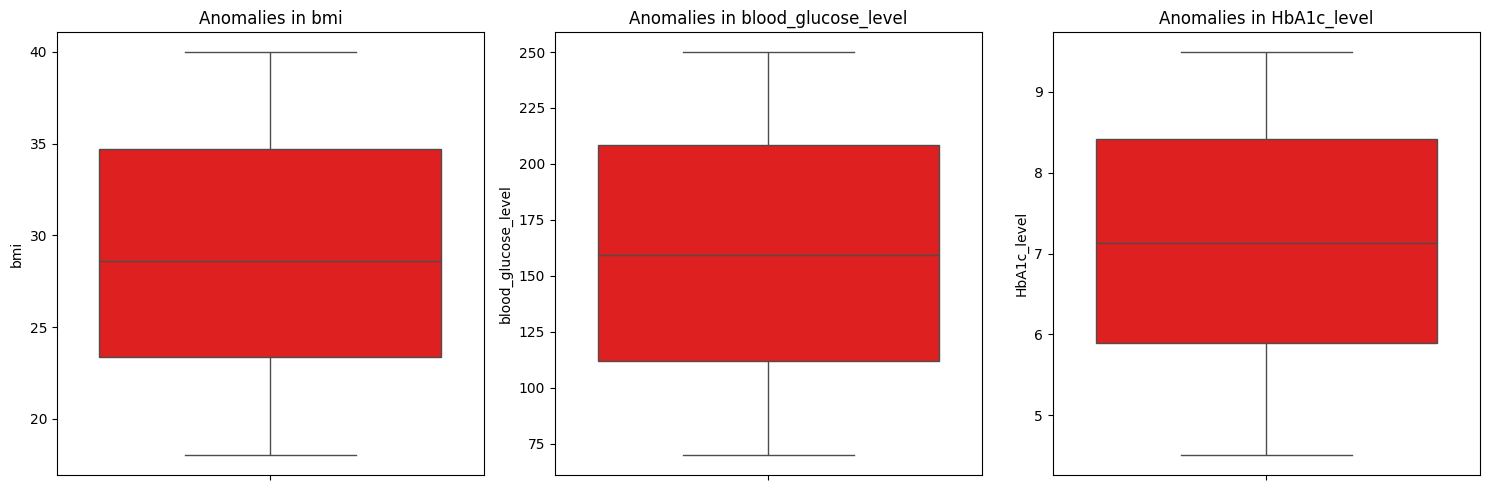

In [101]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(health_indicators, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], color="red")
    plt.title(f"Anomalies in {col}")
    plt.ylabel(col)
plt.tight_layout()
plt.show()

#### ii) Creating health risk profiles using combinations of age, bmi, and HbA1c_level

##### Function to categorize health risk

In [102]:
def risk_profile(row):
    if row["bmi"] > 30 and row["HbA1c_level"] > 6.5 and row["age"] > 50:
        return "High Risk"
    elif row["bmi"] > 25 and row["HbA1c_level"] > 5.7:
        return "Moderate Risk"
    else:
        return "Low Risk"

##### Applying the function to create a new column

In [103]:
df.loc[:, "Health_Risk_Profile"] = df.apply(risk_profile, axis=1)

#####  Displaying the value counts of each risk category

In [104]:
print(df["Health_Risk_Profile"].value_counts())

Health_Risk_Profile
Low Risk         463
Moderate Risk    363
High Risk        174
Name: count, dtype: int64


##### Visualizing the distribution of health risk profiles

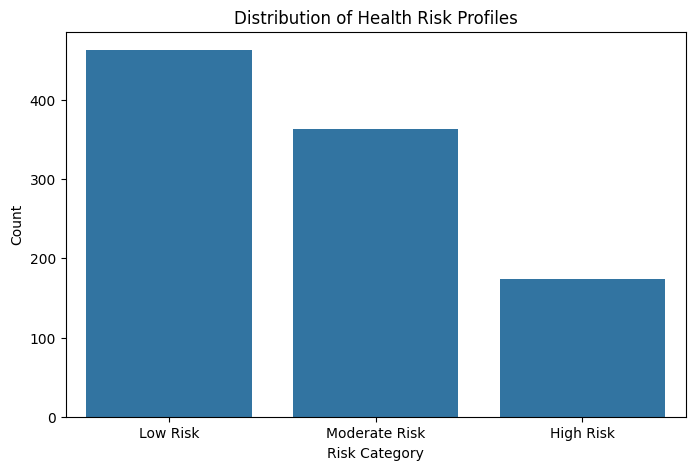

In [105]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Health_Risk_Profile", data=df, order=["Low Risk", "Moderate Risk", "High Risk"])
plt.title("Distribution of Health Risk Profiles")
plt.xlabel("Risk Category")
plt.ylabel("Count")
plt.show()

## 7. Feature Engineering Opportunities

In [107]:
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 40, 60, 100], labels=['0-20', '21-40', '41-60', '61+'])
df['risk_score'] = df['bmi'] * df['HbA1c_level'] * df['blood_glucose_level']

In [110]:
high_risk = df[df['risk_score'] > df['risk_score'].quantile(0.9)]
print("High-Risk Individuals Summary:")
print(high_risk[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'risk_score']].head())

High-Risk Individuals Summary:
    age        bmi  HbA1c_level  blood_glucose_level    risk_score
12   42  35.914824     9.226539           244.395235  80985.128925
29   58  32.646918     8.624322           197.847956  55705.582050
33   55  37.028820     8.865966           235.065297  77171.057447
34   63  37.803568     7.259614           207.516985  56950.817592
35   34  35.690523     8.991923           215.534709  69170.785376
